In [1]:
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import KFold
from scipy.spatial import distance
from sklearn.decomposition import PCA
from numpy import linalg as LA
from scipy.stats import pearsonr
import seaborn as sns
import copy
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import csv
from sklearn import metrics
import tensorflow as tf
import tensorflow.contrib.layers as tl
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten,Input
from keras import backend as K
from keras.models import Model, load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

Using TensorFlow backend.


In [17]:
TrainX = pd.read_csv('crime_prep.csv',delimiter=',')
print (TrainX.shape)
TrainX = TrainX.fillna(0)
del TrainX['v_cat_2']
Y = TrainX['target']
del TrainX['target']

(1994, 128)


In [3]:
TrainX.head()

,v_cont_0,v_cat_0,v_cat_1,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,8,0.0,0.0,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,0.0,0.0,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.00,0.02,0.12,0.45,0.00,0.00,0.0,0.0,0.00,0.00
2,24,0.0,0.0,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.00,0.01,0.21,0.02,0.00,0.00,0.0,0.0,0.00,0.00
3,34,5.0,81440.0,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.00,0.02,0.39,0.28,0.00,0.00,0.0,0.0,0.00,0.00
4,42,95.0,6096.0,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.00,0.04,0.09,0.02,0.00,0.00,0.0,0.0,0.00,0.00


In [12]:
TrainX = (TrainX - TrainX.mean())
numpyMatrix = TrainX.as_matrix()
#print TrainX['ALSQM_Count']
r=[]
p=[]
for i in range(TrainX.shape[1]):
    temp1,temp2 = pearsonr(numpyMatrix[:,i],Y)
    #print temp1,i,
    r.append((temp1,i,TrainX.columns[i],temp2))
r.sort()

In [14]:
frequencies = []
labels =[]
count=0
for ind,x in enumerate(r):
    if(x[0]<-0.4 or x[0]>0.4):
        frequencies.append(x[0])
        labels.append(x[2])
    else:
        if count<10:
            labels.append('-')
            frequencies.append(0.01)
            count+=1
print (len(frequencies))

#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#            ha='center', va='bottom')



39


In [7]:
IndforCor =[]
for ind,x in enumerate(r):
    if(x[0]<-0.4 or x[0]>0.4):
        IndforCor.append(x[1])
Corr =[]
corMatrix = np.zeros((len(IndforCor),len(IndforCor)))
Col1 =[]
for i in range(len(IndforCor)):
    Col1.append(TrainX.columns[IndforCor[i]])
    for j in range(len(IndforCor)):
        temp1,temp2 = pearsonr(numpyMatrix[:,IndforCor[i]],numpyMatrix[:,IndforCor[j]])
        Corr.append((temp1,IndforCor[i],TrainX.columns[IndforCor[i]],IndforCor[j],TrainX.columns[IndforCor[j]],temp2))
        corMatrix[i][j] = temp1
#print Corr
print (corMatrix)
#Col1=np.asmatrix(Col1)
#print Col1.shape
print (corMatrix.shape)

[[ 1.          0.98535803  0.70203221  0.93115452  0.90765181  0.74435828
   0.70546581  0.650295    0.70995358  0.72001292 -0.57233789 -0.34574311
  -0.36953222 -0.40686709 -0.39983477 -0.38334769 -0.42562681 -0.63207119
  -0.53856449 -0.67526909 -0.71427668 -0.67928331 -0.75860905 -0.71013823
  -0.74013536 -0.72992178 -0.76031791 -0.73624412 -0.87019832]
 [ 0.98535803  1.          0.63807121  0.9356161   0.91702409  0.7025794
   0.73267823  0.69125799  0.71021247  0.73432635 -0.51403728 -0.34390019
  -0.3532808  -0.39933904 -0.39091914 -0.3122059  -0.41689381 -0.65501617
  -0.5094343  -0.6174298  -0.67969208 -0.65151541 -0.74363365 -0.73048775
  -0.76073295 -0.74880596 -0.73734909 -0.7005957  -0.84323412]
 [ 0.70203221  0.63807121  1.          0.59682487  0.61415587  0.59606721
   0.50851552  0.44089051  0.34333637  0.30868577 -0.47076213 -0.2809248
  -0.41074252 -0.42571275 -0.37640949 -0.63979503 -0.42076058 -0.36890907
  -0.45096483 -0.48557396 -0.4810748  -0.5174828  -0.54213855 

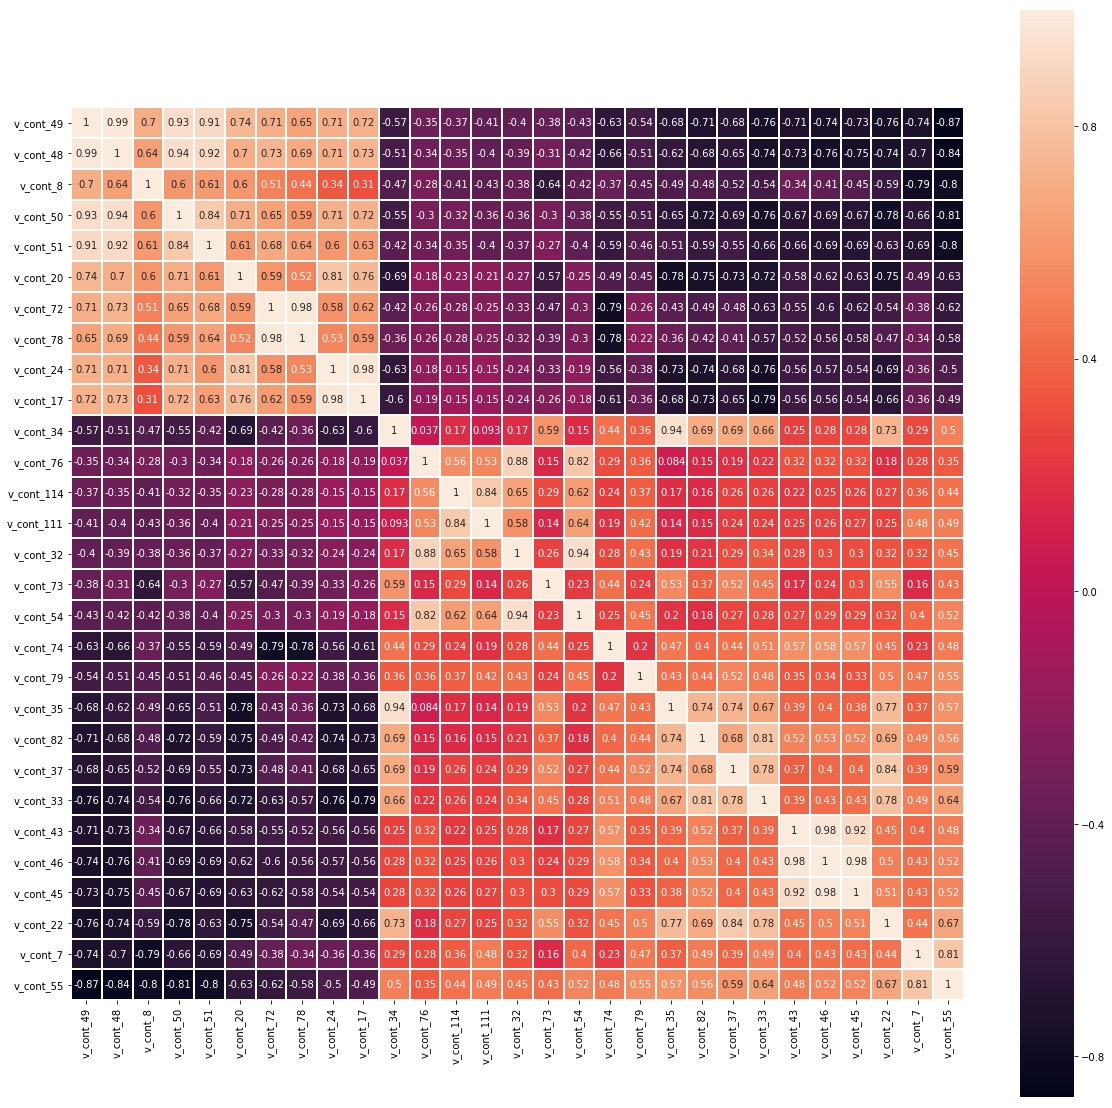

In [8]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corMatrix, 
        xticklabels=Col1,
        yticklabels=Col1,linewidths=1,annot=True, ax=ax,square =True)

plt.show()

In [11]:
print (IndforCor)
t=[]
for i in IndforCor:
    t.append(TrainX.columns[i])
print (t)
FinalTrainSetForTrain = np.zeros((len(IndforCor),numpyMatrix.shape[0]))
for ind,i in enumerate(IndforCor):
    FinalTrainSetForTrain[ind] = (numpyMatrix[:,i])
FinalTrainSetForTrain = FinalTrainSetForTrain.T
print (FinalTrainSetForTrain.shape)
print (Y.shape)

X_train,X_test,Y_train,Y_test = train_test_split(FinalTrainSetForTrain,Y,test_size = 0.3,random_state=42)
#Normal Linear Regression

regr = linear_model.LinearRegression(normalize = True)
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
Weights = regr.coef_
print (Weights)
print ("RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred)))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Linear Regression With Ridge regularisation
reg = linear_model.Ridge(alpha = 0.2,normalize = True)
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
print ("RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred)))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))


# Linear Regression With Lasso regularisation
reg = linear_model.Lasso(alpha = 0.2,normalize = True)
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
print ("RMSE %.2f" % math.sqrt(mean_squared_error(Y_test,Y_pred)))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))


[48, 47, 7, 49, 50, 19, 71, 77, 23, 16, 33, 75, 113, 110, 31, 72, 53, 73, 78, 34, 81, 36, 32, 42, 45, 44, 21, 6, 54]
['v_cont_49', 'v_cont_48', 'v_cont_8', 'v_cont_50', 'v_cont_51', 'v_cont_20', 'v_cont_72', 'v_cont_78', 'v_cont_24', 'v_cont_17', 'v_cont_34', 'v_cont_76', 'v_cont_114', 'v_cont_111', 'v_cont_32', 'v_cont_73', 'v_cont_54', 'v_cont_74', 'v_cont_79', 'v_cont_35', 'v_cont_82', 'v_cont_37', 'v_cont_33', 'v_cont_43', 'v_cont_46', 'v_cont_45', 'v_cont_22', 'v_cont_7', 'v_cont_55']
(1994, 29)
(1994,)
[-0.07504571 -0.19967422 -0.00510064 -0.07142772 -0.0011137  -0.12561575
 -0.34242924  0.37813587  0.20999954 -0.03788368 -0.17071969  0.25855063
  0.05622483  0.10780783  0.08394673  0.20918654 -0.2672854   0.10121149
  0.03915836  0.12656006  0.03668487 -0.05936492 -0.06627758  0.44234524
 -0.60607039  0.23914281  0.06557077  0.17312485  0.15413479]
RMSE 0.13
Variance score: 0.64
RMSE 0.13
Variance score: 0.64
RMSE 0.22
Variance score: -0.01
